<a href="https://colab.research.google.com/github/Ronaldo-Nunes/Imersao_Dados_Alura/blob/main/Imersao_dados_4_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [174]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [175]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

#### 1 - Realizar a média da metragem para cara um dos bairros (Paulo)

In [176]:
print("O conjunto de dados possui " + str(dados["Bairro"].nunique()) + " bairros distintos.")

agrupamento_por_bairros = dados[["Bairro", "Metragem"]].groupby("Bairro", as_index=False)
metragem_media_por_bairro = agrupamento_por_bairros.mean()
# Os valores foram ordenados do maior para o menor
metragem_media_por_bairro.sort_values(by="Metragem", ascending=False).head()

O conjunto de dados possui 701 bairros distintos.


,Bairro,Metragem
426,Sítio Represa,37000.000000
487,Vila Castelo,2850.000000
170,Jardim Guedala,2486.640199
309,Jardim das Camélias,1700.000000
40,Chácara Flora,1260.727273


Verificar quais bairros possuem as maiores e menores médias de tamanho de imóveis

In [177]:
bairro_maior_metragem = metragem_media_por_bairro[metragem_media_por_bairro["Metragem"] == metragem_media_por_bairro["Metragem"].max()]
bairro_menor_metragem = metragem_media_por_bairro[metragem_media_por_bairro["Metragem"] == metragem_media_por_bairro["Metragem"].min()]
pd.concat([bairro_maior_metragem, bairro_menor_metragem])

,Bairro,Metragem
426,Sítio Represa,37000.0
529,Vila Guaca,10.0


#### 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [178]:
lista_bairros = ["Jardim Guedala", "Vila Mariana", "Ipiranga"]
dados[dados["Bairro"].isin(lista_bairros)].sample(8)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3088,Rua Açaraí,Jardim Guedala,São Paulo,497,3,4,4,R$ 3.000.000
4653,NaN,Jardim Guedala,São Paulo,817,4,4,7,R$ 4.900.000
2736,NaN,Jardim Guedala,São Paulo,547,3,4,3,R$ 2.500.000
8429,Rua Doutor Sabóia de Medeiros,Vila Mariana,São Paulo,220,3,3,1,R$ 780.000
9270,"Rua Ouvidor Peleja, 780",Vila Mariana,São Paulo,160,1,2,2,R$ 1.200.000
9761,Rua Calíope,Jardim Guedala,São Paulo,572,4,7,7,R$ 3.229.000
4169,Rua Dona Inácia Uchôa,Vila Mariana,São Paulo,180,3,1,2,R$ 1.800.000
7135,NaN,Vila Mariana,São Paulo,240,3,1,3,R$ 1.500.000


In [179]:
dados.loc[dados["Bairro"] == "Alto de Pinheiros"].sample(8)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
593,Rua Silva Prado,Alto de Pinheiros,São Paulo,365,5,3,4,R$ 3.300.000
988,NaN,Alto de Pinheiros,São Paulo,350,4,5,5,R$ 3.900.000
1993,NaN,Alto de Pinheiros,São Paulo,399,3,4,6,R$ 13.000\n /Mês
4404,Avenida Professor Fonseca Rodrigues,Alto de Pinheiros,São Paulo,598,4,7,4,R$ 8.067.520
2934,NaN,Alto de Pinheiros,São Paulo,710,4,4,5,R$ 7.800.000
1250,Rua Timbuíba,Alto de Pinheiros,São Paulo,400,4,5,4,R$ 3.300.000
4080,Rua Doutor Carlos Norberto de Souza Aranha,Alto de Pinheiros,São Paulo,385,4,7,4,R$ 5.800.000
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,R$ 5.500.000


### 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

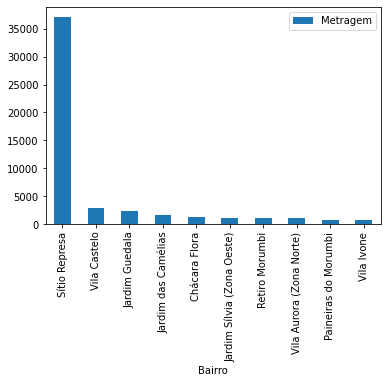

In [180]:
bairros_ordenados_medias = metragem_media_por_bairro.sort_values(by="Metragem", ascending=False, ignore_index=True)
bairros_ordenados_medias.head(10).plot.bar(x='Bairro', y='Metragem')

Percebe-se que o Sítio Represa é um ponto fora da curva, haja vista que a área média dos imóveis é imensamente superior aos demais, mesmo no grupo dos 10 bairros com maior média de área de imóveis.

Jardim Guedala                403
Retiro Morumbi                 44
Jardim Sílvia (Zona Oeste)     31
Paineiras do Morumbi           30
Chácara Flora                  11
Vila Aurora (Zona Norte)        2
Vila Ivone                      2
Jardim das Camélias             1
Vila Castelo                    1
Sítio Represa                   1
Name: Bairro, dtype: int64

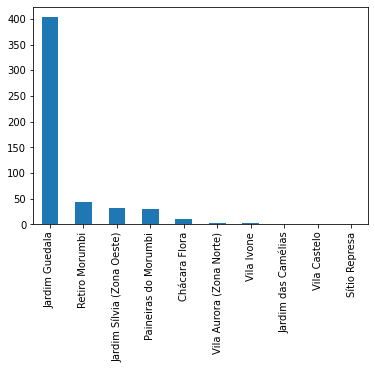

In [181]:
# Contar quantos imóveis existem nos 10 bairros com maiores médias

bairros_maiores_medias = bairros_ordenados_medias['Bairro'].head(10)
imoveis_bairros_maiores_medias = dados[dados["Bairro"].isin(bairros_maiores_medias)]["Bairro"].value_counts()
display(imoveis_bairros_maiores_medias)
imoveis_bairros_maiores_medias.plot.bar(x='Bairro', y='Metragem')

Também é possível verificar que os bairros Vila Aurora, Vila Ivone, Jardim das Camélias, Vila Castelo e Sítio Represa concentram poucos imóveis, mas com grandes áreas.

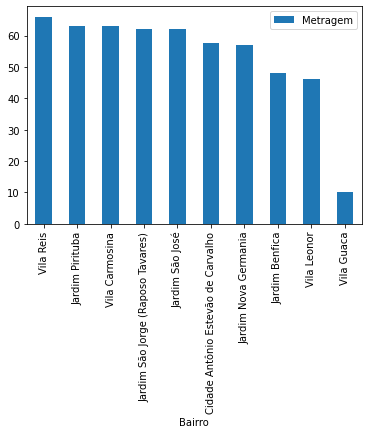

In [182]:
bairros_ordenados_medias.tail(10).plot.bar(x='Bairro', y='Metragem')

Entre os bairros com menores propriedades, há uma maior homegeneidade na metragem média das propriedades, excetuando-se o bairro Vila Guaca.

Cidade Antônio Estevão de Carvalho    2
Jardim Benfica                        1
Jardim Nova Germania                  1
Vila Carmosina                        1
Vila Leonor                           1
Jardim Pirituba                       1
Jardim São José                       1
Jardim São Jorge (Raposo Tavares)     1
Vila Guaca                            1
Vila Reis                             1
Name: Bairro, dtype: int64

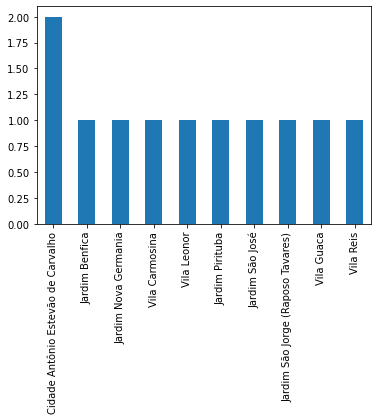

In [183]:
# Contar quantos imóveis existem nos 10 bairros com menores médias

bairros_menores_medias = bairros_ordenados_medias['Bairro'].tail(10)
imoveis_bairros_menores_medias = dados[dados["Bairro"].isin(bairros_menores_medias)]["Bairro"].value_counts()
display(imoveis_bairros_menores_medias)
imoveis_bairros_menores_medias.plot.bar(x='Bairro', y='Metragem')

Foi possível verificar que as menores médias de metragem do conjunto de dados estão relacionadas, também, ao pouco número de imóveis disponíveis nestas localidades.

16
1
40


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000


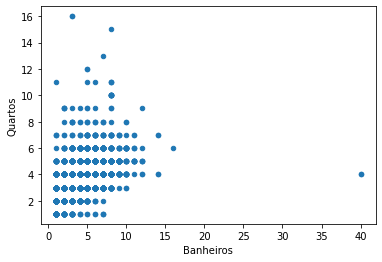

In [184]:
print(dados["Quartos"].max())
print(dados['Quartos'].min())
print(dados['Banheiros'].max())
dados.plot.scatter(x='Banheiros', y='Quartos')
dados[dados['Banheiros'] == 40]

### 4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [185]:
media_quartos = dados["Quartos"].mean()
mediana_metragem = dados['Metragem'].median()
min_vagas = dados['Vagas'].min()
max_vagas = dados['Vagas'].max()

print(f"Média de quartos: {media_quartos}")
print(f"Mediana de metragem: {mediana_metragem}")
print(f"Mínimo de vagas: {min_vagas}")
print(f"Máximo de vagas: {max_vagas}")

Média de quartos: 3.4831135091926457
Mediana de metragem: 290.0
Mínimo de vagas: 1
Máximo de vagas: 50


### 5 - Descobrir quais são os bairros que possuem ruas sem nome. (Vivi)

In [186]:
ruas_sem_nome = dados['Rua'].isna()
dados[ruas_sem_nome].groupby('Bairro', as_index=False).size().sort_values(by='size', ascending=False)

,Bairro,size
106,Jardim Guedala,190
4,Alto de Pinheiros,169
134,Jardim Paulista,138
99,Jardim Europa,128
114,Jardim Leonor,118
...,...,...
150,Jardim Santo Elias,1
153,Jardim Sul São Paulo,1
287,Vila Darli,1
286,Vila Curuçá,1
